In [1]:
import polars as pl
from polars_reverse_geocode import find_closest_state
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

In [2]:
df = pl.read_csv("./answers_df.csv")
df.head()

gameId,roundNumber,lat,lng,country_code
str,i64,f64,f64,str
"""d30d3d04-d8d1-44cb-ab9e-294433…",1,-78.065498,164.144104,"""AQ"""
"""d30d3d04-d8d1-44cb-ab9e-294433…",2,13.854082,100.843712,"""TH"""
"""d30d3d04-d8d1-44cb-ab9e-294433…",3,13.557908,144.854996,"""GU"""
"""d30d3d04-d8d1-44cb-ab9e-294433…",4,38.005451,23.947958,"""GR"""
"""d30d3d04-d8d1-44cb-ab9e-294433…",5,34.247738,36.002708,"""LB"""


In [3]:
df.shape

(2693, 5)

In [4]:
us_points = df.filter(pl.col("country_code") == "US")
us_points = us_points.with_columns(
    state=find_closest_state("lat", "lng")
)
us_points = us_points.group_by("state").count()
us_points = us_points.to_pandas()
us_points

C:\Users\Admin\AppData\Local\Temp\ipykernel_17772\2601885195.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  us_points = us_points.group_by("state").count()


,state,count
0,Hawaii,10
1,Arizona,1
2,Kentucky,2
3,Iowa,2
4,Michigan,2
5,New Jersey,4
6,Oregon,2
7,Massachusetts,2
8,Georgia,3
9,New York,5


In [5]:
# https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

In [6]:
states = gpd.read_file('./cb_2018_us_state_500k.shp')
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [7]:
gdf = states.merge(us_points, how="left", left_on="NAME", right_on="state")
gdf.fillna({"count": 0}, inplace=True)
gdf

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,count
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",NaN,0.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,3.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",Oklahoma,2.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,2.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",NaN,0.0
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2...",NaN,0.0
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",Michigan,2.0
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",Massachusetts,2.0
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",NaN,0.0
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",Florida,3.0


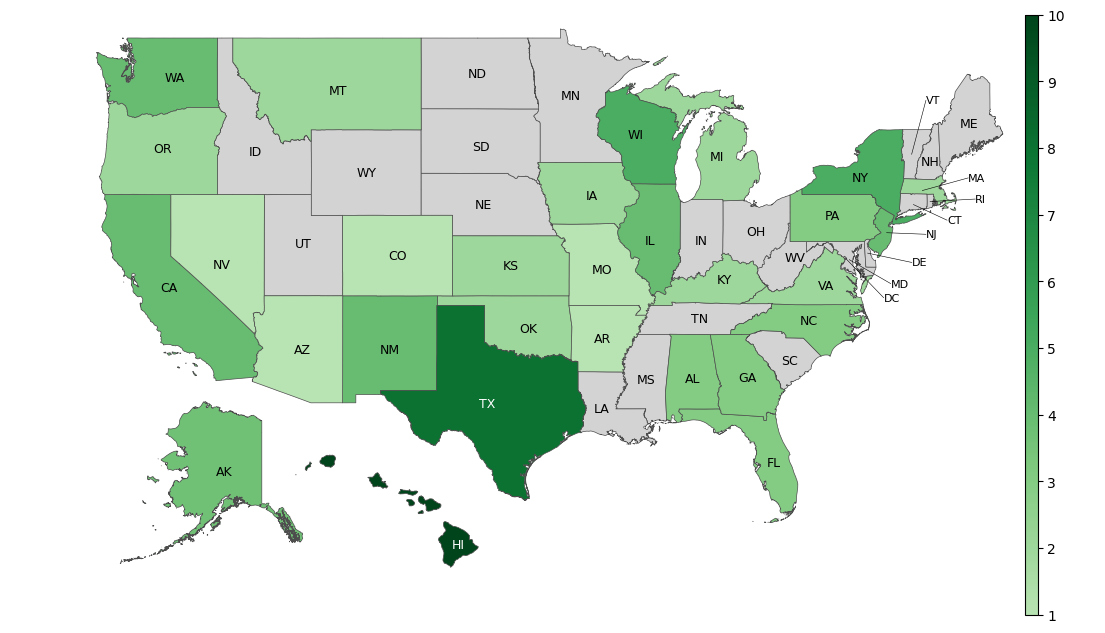

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap 
import numpy as np

gdf['count'].fillna(0)
gdf = gdf.to_crs("EPSG:3395")

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.axis('off')

# Colors
cmap_original = plt.get_cmap('Greens') 
max_val = gdf['count'].max()
custom_colors = cmap_original(np.linspace(0.3, 1.0, 5))
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", custom_colors)
norm = Normalize(vmin=1, vmax=max_val)

gdf[gdf['count'] == 0].plot(
    ax=ax, 
    color='lightgray', 
    edgecolor='0.3', 
    linewidth=0.5
)

gdf[gdf['count'] > 0].plot(
    column='count',
    cmap=custom_cmap,  
    norm=norm,        
    ax=ax,
    edgecolor='0.3',
    linewidth=0.5
)

# USA
ax.set_xlim(-14500000, -6800000)  
ax.set_ylim(2800000, 6400000)

ax.set_autoscale_on(False)

# LEGED            
cax = fig.add_axes([0.85, 0.15, 0.009, 0.6]) 
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm._A = [] 
cbar = fig.colorbar(sm, cax=cax)

# Alaska
ax_ak = fig.add_axes([0.15, 0.18, 0.2, 0.2]) 
ax_ak.axis('off')

ax_ak.set_xlim(-22000000, -14000000)
ax_ak.set_ylim(6000000, 12000000)

gdf.plot(column='count', cmap=custom_cmap, ax=ax_ak, edgecolor='0.3', missing_kwds={"color": "lightgrey"}, linewidth=0.5)

# Hawaii
ax_hi = fig.add_axes([0.23, 0.16, 0.35, 0.2])
ax_hi.axis('off')

ax_hi.set_xlim(-17900000, -17100000)
ax_hi.set_ylim(2000000, 2700000)

gdf.plot(column='count', cmap=custom_cmap, ax=ax_hi, edgecolor='0.3', missing_kwds={"color": "lightgrey"}, linewidth=0.5)

special_case_states = {
    'VT': [-8000000, 5800000],
    'MA': [-7700000, 5250000],
    'RI': [-7650000, 5100000],
    'CT': [-7850000, 4950000],
    'NJ': [-8000000, 4850000],
    'DE': [-8100000, 4650000],
    'MD': [-8250000, 4500000],
    'DC': [-8300000, 4400000], 
}

label_offsets = {
    'LA': (-100000, 0),
    'ID': (100000, -250000),
    'NC': (120000, 70000),
    'VA': (0, -70000),
    'NH': (-5500, -70000)
}

def get_text_color(count_value, cmap, norm):
    if count_value == 0:
        return 'black'
    
    rgba_color = cmap(norm(count_value))
    
    luminance = 0.299*rgba_color[0] + 0.587*rgba_color[1] + 0.114*rgba_color[2]
    
    return 'white' if luminance < 0.4 else 'black'

main_xmin, main_xmax = ax.get_xlim()
main_ymin, main_ymax = ax.get_ylim()

ak_xmin, ak_xmax = ax_ak.get_xlim()
ak_ymin, ak_ymax = ax_ak.get_ylim()

hi_xmin, hi_xmax = ax_hi.get_xlim()
hi_ymin, hi_ymax = ax_hi.get_ylim()

for idx, row in gdf.iterrows():
    if row['geometry'] is None:
        continue
        
    state_abbr = row['STUSPS']
    
    if row['geometry'].geom_type in ['MultiPolygon', 'GeometryCollection']:
        largest_polygon = max(row['geometry'].geoms, key=lambda p: p.area)
        point = largest_polygon.representative_point()
    else:
        point = row['geometry'].representative_point()
        
    if (main_xmin < point.x < main_xmax) and (main_ymin < point.y < main_ymax):
        if state_abbr in special_case_states:
            text_coord = special_case_states[state_abbr]
            ax.text(x=text_coord[0], y=text_coord[1], s=state_abbr, ha='left', va='center', fontsize=8, color='black')
            ax.plot([text_coord[0], point.x], [text_coord[1], point.y], color='black', linewidth=0.4)
        else:
            plot_x, plot_y = point.x, point.y
            if state_abbr in label_offsets:
                offset_x, offset_y = label_offsets[state_abbr]
                plot_x += offset_x
                plot_y += offset_y
            count_value = row['count']
            text_color = get_text_color(count_value, custom_cmap, norm)
            ax.text(x=plot_x, y=plot_y, s=state_abbr, ha='center', va='center', fontsize=9, color=text_color)

    elif (ak_xmin < point.x < ak_xmax) and (ak_ymin < point.y < ak_ymax):
        count_value = row['count']
        text_color = get_text_color(count_value, custom_cmap, norm)
        ax_ak.text(point.x, point.y, state_abbr, ha='center', va='center', fontsize=9, color=text_color)

    elif (hi_xmin < point.x < hi_xmax) and (hi_ymin < point.y < hi_ymax):
        count_value = row['count']
        text_color = get_text_color(count_value, custom_cmap, norm)
        ax_hi.text(point.x, point.y, state_abbr, ha='center', va='center', fontsize=9, color=text_color)

plt.show()
